# HEHEHE

In [ ]:
import pandas as pd
df = pd.read_csv("/content/DataSudahBersih_synthetic_asthma_dataset.csv")

# Cek struktur data
print("Preview data:")
display(df.head())

Preview data:


,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,Dust,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Unknown
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Unknown
2,ASTH100002,72,Female,17.6,Never,0,Dust,Moderate,Moderate,Indoor,Diabetes,0.38,0,303.3,15.3,0,Unknown
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,Dust,Moderate,Active,Indoor,Diabetes,0.82,3,535.0,27.7,0,Unknown


Pertannyaan analisis kompleks:

H1: Apakah pasien dengan riwayat keluarga asma memiliki risiko lebih tinggi menderita asma?

H2: Apakah status merokok memengaruhi tingkat kontrol asma?

H3: Apakah kepatuhan pengobatan berpengaruh terhadap tingkat kontrol asma?

## Uji Statistik

### H1 -> Chi-Square Test (Family_History vs Has_Asthma)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi antara riwayat keluarga dan status asma
contingency_table = pd.crosstab(df['Family_History'], df['Has_Asthma'])
print("Tabel Kontingensi:")
print(contingency_table)

# Uji Chi-Square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected,
                   index=contingency_table.index,
                   columns=contingency_table.columns))

# Interpretasi hasil
if p_value < 0.05:
    print("\n Hasil: Tolak H0 → Ada hubungan signifikan antara riwayat keluarga dan asma.")
else:
    print("\n Hasil: Gagal menolak H0 → Tidak ada hubungan signifikan.")


Tabel Kontingensi:
Has_Asthma         0     1
Family_History            
0               6079   887
1               1488  1546

Chi-Square Statistic: 1675.0775786178124
p-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
Has_Asthma              0          1
Family_History                      
0               5271.1722  1694.8278
1               2295.8278   738.1722

 Hasil: Tolak H0 → Ada hubungan signifikan antara riwayat keluarga dan asma.


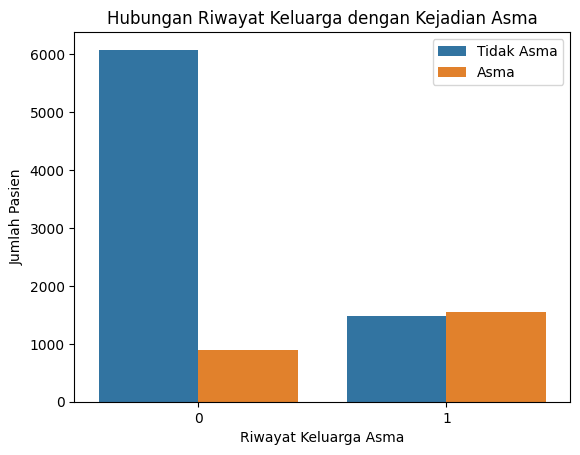

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.countplot(x='Family_History', hue='Has_Asthma', data=df)
plt.title('Hubungan Riwayat Keluarga dengan Kejadian Asma')
plt.xlabel('Riwayat Keluarga Asma')
plt.ylabel('Jumlah Pasien')
plt.legend(['Tidak Asma', 'Asma'])
plt.show()


### H2 --> Status merokok memengaruhi tingkat kontrol asma, tetapi kesimpulan yang lebih valid memerlukan data kontrol asma yang lebih lengkap.


In [ ]:
contingency2 = pd.crosstab(df["Smoking_Status"], df["Asthma_Control_Level"])
chi2_2, p2, dof2, expected2 = chi2_contingency(contingency2)

print("\n=== H2: Smoking Status vs Asthma Control Level ===")
print("Chi-square:", chi2_2)
print("p-value:", p2)
if p2 < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara status merokok dan kontrol asma.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara status merokok dan kontrol asma.")



=== H2: Smoking Status vs Asthma Control Level ===
Chi-square: 933.9811511049838
p-value: 1.690503750377706e-198
Kesimpulan: Ada hubungan signifikan antara status merokok dan kontrol asma.


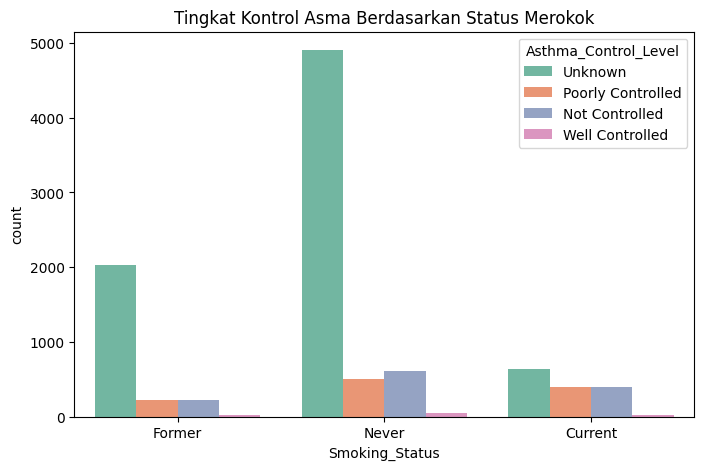

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Smoking_Status", hue="Asthma_Control_Level", palette="Set2")
plt.title("Tingkat Kontrol Asma Berdasarkan Status Merokok")
plt.show()

### H3 -> ANOVA (Asthma_Control_Level vs Medication_Adherence)

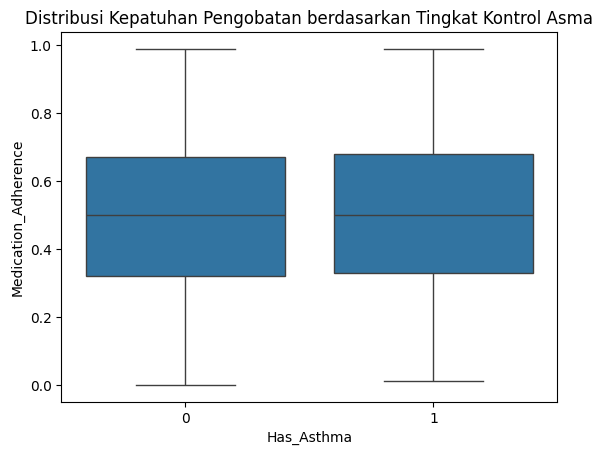

Uji Normalitas (Shapiro-Wilk):
Kelompok 0: p-value = 3.424225965045254e-29
Kelompok 1: p-value = 1.163123551615559e-16

Uji Homogenitas Varians (Levene): p-value = 0.7579738673307073

Uji Kruskal-Wallis:
H-statistic: 0.15477360646797414 p-value: 0.6940146404665932

 Hasil: Gagal menolak H0 → Tidak ada perbedaan signifikan.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7567.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import f_oneway, shapiro, levene, kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kepatuhan pengobatan berdasarkan kontrol asma
sns.boxplot(x='Has_Asthma', y='Medication_Adherence', data=df)
plt.title('Distribusi Kepatuhan Pengobatan berdasarkan Tingkat Kontrol Asma')
plt.show()

# Uji Asumsi Normalitas
groups = [df[df['Has_Asthma'] == level]['Medication_Adherence']
           for level in df['Has_Asthma'].unique()]

print("Uji Normalitas (Shapiro-Wilk):")
for i, g in enumerate(groups):
    stat, p = shapiro(g)
    print(f"Kelompok {df['Has_Asthma'].unique()[i]}: p-value = {p}")

# Uji Homogenitas Varians
levene_stat, levene_p = levene(*groups)
print("\nUji Homogenitas Varians (Levene): p-value =", levene_p)

# Jika asumsi normalitas dan homogenitas terpenuhi → ANOVA
if all(shapiro(g)[1] > 0.05 for g in groups) and levene_p > 0.05:
    f_stat, p_value = f_oneway(*groups)
    print("\nUji ANOVA:")
    print("F-statistic:", f_stat, "p-value:", p_value)
else:
    # Gunakan Kruskal-Wallis jika asumsi tidak terpenuhi
    h_stat, p_value = kruskal(*groups)
    print("\nUji Kruskal-Wallis:")
    print("H-statistic:", h_stat, "p-value:", p_value)

# Interpretasi hasil
if p_value < 0.05:
    print("\n Hasil: Tolak H0 → Ada perbedaan signifikan kepatuhan antar tingkat kontrol asma.")
else:
    print("\n Hasil: Gagal menolak H0 → Tidak ada perbedaan signifikan.")


# SESUAI MAT

## H0 :



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('clean_synthetic_asthma_dataset.csv')

In [ ]:
# contingency
ct = pd.crosstab(df['Family_History'], df['Has_Asthma'])
chi2, p, dof, exp = chi2_contingency(ct)
# jika salah satu expected <5, pakai fisher_exact (2x2 only)
oddsratio, p_fisher = fisher_exact(ct.values)  # hanya 2x2

In [ ]:
# logistic regression (opsional, dengan covariate)
X = df[['Family_History','Age','Gender']].copy() # Create a copy to avoid SettingWithCopyWarning
X = pd.get_dummies(X, columns=['Gender'], drop_first=True).astype(int) # One-hot encode Gender and convert to int
X = sm.add_constant(X) # Add constant after one-hot encoding

y = df['Has_Asthma']
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.475802
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Has_Asthma   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Oct 2025   Pseudo R-squ.:                  0.1425
Time:                        16:33:21   Log-Likelihood:                -4758.0
converged:                       True   LL-Null:                       -5548.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8781      0.063    -29.786      0.000      -2.002      -1.755
Family_History   

In [ ]:
contingency_table = pd.crosstab(df['Family_History'], df['Has_Asthma'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("Chi-square:", chi2, "p-value:", p)

Chi-square: 1675.0775786178124 p-value: 0.0


## H2

In [ ]:
# filter unknown
df2 = df[df['Asthma_Control_Level'] != 'Unknown'].copy()

In [ ]:
# contingency + chi2
ct = pd.crosstab(df2['Smoking_Status'], df2['Asthma_Control_Level'])
chi2, p, dof, exp = chi2_contingency(ct)

In [ ]:
# ordinal logistic (statsmodels)
from statsmodels.miscmodels.ordinal_model import OrderedModel
# encode Asthma_Control_Level to ordered ints e.g. ['Well Controlled'=2,'Poorly Controlled'=1,'Not Controlled'=0]
control_mapping = {'Not Controlled': 0, 'Poorly Controlled': 1, 'Well Controlled': 2}
df2['control_code'] = df2['Asthma_Control_Level'].map(control_mapping)

# Drop rows with NaN in 'control_code' that might result from mapping issues
df2.dropna(subset=['control_code'], inplace=True)
df2['control_code'] = df2['control_code'].astype(int) # Ensure control_code is integer type

# Convert the output of get_dummies to int to avoid object dtype
smoking_dummies = pd.get_dummies(df2['Smoking_Status'], drop_first=True).astype(int)

model = OrderedModel(df2['control_code'], smoking_dummies, # Removed sm.add_constant()
                     distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.817525
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
                             OrderedModel Results                             
Dep. Variable:           control_code   Log-Likelihood:                -1989.0
Model:                   OrderedModel   AIC:                             3986.
Method:            Maximum Likelihood   BIC:                             4009.
Date:                Thu, 09 Oct 2025                                         
Time:                        17:34:54                                         
No. Observations:                2433                                         
Df Residuals:                    2429                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [ ]:
contingency_table = pd.crosstab(df['Smoking_Status'], df['Asthma_Control_Level'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("Chi-square:", chi2, "p-value:", p)

Chi-square: 933.9811511049838 p-value: 1.690503750377706e-198


## H3

In [ ]:
control_counts = df['Asthma_Control_Level'].value_counts()
print(control_counts)

# Hitung proporsi
control_props = control_counts / control_counts.sum()
print(control_props)

Asthma_Control_Level
Unknown              7567
Not Controlled       1229
Poorly Controlled    1120
Well Controlled        84
Name: count, dtype: int64
Asthma_Control_Level
Unknown              0.7567
Not Controlled       0.1229
Poorly Controlled    0.1120
Well Controlled      0.0084
Name: count, dtype: float64


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Hitung jumlah dan total
count_well = control_counts.get('Well Controlled', 0)
n_total = control_counts.sum()

# Asumsikan target ideal 50%
p0 = 0.5

In [ ]:
# Lakukan uji proporsi (H0: p = 0.5, H1: p < 0.5)
stat, p_value = proportions_ztest(count=count_well, nobs=n_total, value=p0, alternative='smaller')

print(f"Z-statistic: {stat:.3f}")
print(f"P-value: {p_value:.4f}")

Z-statistic: -538.647
P-value: 0.0000
